In [18]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import numpy as np

## SciPy 

SciPy est le second module Python dont vous risquez très fortement d'avoir besoin. Il s'agit en quelque sorte de la boite à outils Python du calcul numérique, l'objectif du module étant, on le rappel, d'avoir à disposition dans Python un environnement tout près dédié au calcul scientifique comme Matlab. 

SciPy se décompose en différents sous-module chacun ayant ses spécificités et son champ d'actions. La liste des sous-modules de SciPy est la suivante :   


* Clustering package (scipy.cluster)
* Constants (scipy.constants)
* Discrete Fourier transforms (scipy.fftpack)
* Integration and ODEs (scipy.integrate)
* Interpolation (scipy.interpolate)
* Input and output (scipy.io)
* Linear algebra (scipy.linalg)
* Miscellaneous routines (scipy.misc)
* Multi-dimensional image processing (scipy.ndimage)
* Orthogonal distance regression (scipy.odr)
* Optimization and root finding (scipy.optimize)
* Signal processing (scipy.signal)
* Sparse matrices (scipy.sparse)
* Spatial algorithms and data structures (scipy.spatial)
* Special functions (scipy.special)
* Statistical functions (scipy.stats)

Dans la suite nous n'allons bien entendu pas passer en revue toutes les fonctionnalités de SciPy mais nous allons nous concentrer sur les quelques unes qui vous seront certainement indispensable par la suite. Pour une revue et une présentation détaillée de l'ensemble des possibilités offertes par SciPy je vous invite à lire la [documentation](https://docs.scipy.org/doc/scipy/reference/).  


### scipy.interpolate





`scipy.interpolate` est un sous-module de SciPy permettant de faire des interpolations de données, expérimentales par exemple, et ainsi pouvoir avoir des évaluations de la mesure en des points où les données sont manquantes. 

In [64]:
import scipy.interpolate as sci

La fonction que vous riquez d'utiliser le plus dans ce module est `interp1d` ci-dessous un exemple d'utilisation sur des données simulées. 

In [65]:
time_acquisition = np.linspace(0, 1, 20)
bruit = (np.random.random(20)*2 - 1) * 1e-1
fake_data = np.sin(2 * np.pi * time_acquisition) + bruit
interp_lineaire = sci.interp1d( time_acquisition, fake_data )
print( type(interp_lineaire) ) 

<class 'scipy.interpolate.interpolate.interp1d'>


L'object `interp_lineaire` que l'on récupère en sortie de la fonction `interp1d` est d'un type assez particulier comme vous pouvez le voir ci-dessus. Afin de l'utiliser pour évaluer vos données interpolées en un instant $t$,ou en plusieurs instant simultanément, il vous suffit d'utiliser la variable `interp_lineaire` comme une fonction.  

In [66]:
time_to_evaluate = np.linspace(0, 1, 100)
evaluation = interp_lineaire( time_to_evaluate )
print(evaluation)

[ 0.08147696  0.13597463  0.19047229  0.24496995  0.29946762  0.35396528
  0.40147202  0.44711451  0.492757    0.53839949  0.58404199  0.62968003
  0.67531484  0.72094966  0.76658447  0.81221928  0.8551508   0.89344813
  0.93174545  0.97004277  1.00834009  1.04124216  1.04536958  1.049497
  1.05362442  1.05775183  1.06187925  1.02909072  0.99425131  0.95941189
  0.92457247  0.88973306  0.87360026  0.8641484   0.85469653  0.84524467
  0.83579281  0.80009198  0.74076708  0.68144219  0.62211729  0.56279239
  0.49578325  0.4121249   0.32846656  0.24480821  0.16114986  0.08019971
  0.02226923 -0.03566125 -0.09359173 -0.15152221 -0.2094527  -0.26372832
 -0.31757395 -0.37141959 -0.42526522 -0.47911086 -0.53131039 -0.58275018
 -0.63418998 -0.68562977 -0.73706956 -0.78194117 -0.81951482 -0.85708846
 -0.8946621  -0.93223574 -0.96665853 -0.99225893 -1.01785932 -1.04345971
 -1.06906011 -1.09278223 -1.08269549 -1.07260876 -1.06252202 -1.05243528
 -1.04234854 -1.00697977 -0.96687062 -0.92676147 -0.8

On peut alors s'amuser à tracer les données originale et les points interpolés

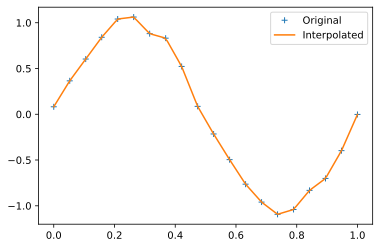

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(time_acquisition, fake_data, "+", label="Original")
plt.plot(time_to_evaluate, evaluation, label="Interpolated")
plt.legend()

Si on le souhaite la fonction `interp1d` dispose de plusieurs options notamment l'option `kind` qui permet de spécifier le type d'interpolation à réaliser. Par défautl l'interpolation réalisée est une interpolation linéaire mais on peut si on le souhaite réaliser une intepolation quadratique ou cubique. 

(0.85, 1.1)

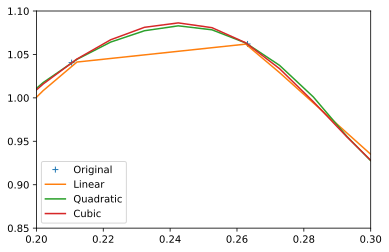

In [68]:
interp_quadratic = sci.interp1d( time_acquisition, fake_data, kind="quadratic" )
interp_cubic = sci.interp1d( time_acquisition, fake_data, kind="cubic" )
evaluation_quad = interp_quadratic( time_to_evaluate )
evaluation_cube = interp_cubic( time_to_evaluate )

plt.plot(time_acquisition, fake_data, "+", label="Original")
plt.plot(time_to_evaluate, evaluation, label="Linear")
plt.plot(time_to_evaluate, evaluation_quad, label="Quadratic")
plt.plot(time_to_evaluate, evaluation_cube, label="Cubic")
plt.legend()
plt.xlim(0.2,0.3)      ## On fait un zoom pour mieux
plt.ylim(0.85, 1.1)    ## voir la différence 

Juste pour information, sachez que la même fonction existe pour les données dépendants de deux variables. Il s'agit de la fonction `interp2d`. Son utilisation est légèrement plus délicate puisqu'elle nécessite la construction d'une grille **régulière** pour réaliser l'interpolation. Ci-dessous un exemple d'application 

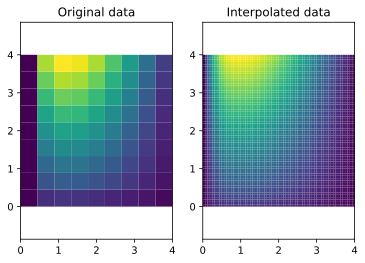

In [24]:
x = np.linspace(0, 4, 10)
y = np.linspace(0, 4, 10)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X**0.5/2) * np.exp(Y**0.5)

x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
f = sci.interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].axis("equal")
ax[0].set_title("Original data")
ax[0].pcolormesh(X, Y, Z)


X2, Y2 = np.meshgrid(x2, y2)
ax[1].axis("equal")
ax[1].set_title("Interpolated data")
ax[1].pcolormesh(X2, Y2, Z2)


### scipy.integrate

Le second sous module de SciPy qui vous sera très certainement utile est `scipy.integrate`. Il s'agit du module contenant toutes les fonctions dédiées : 
* à l'intégration de fonctions mathématiques.
* à l'intégration d'Équations Différentielles Ordinaires.

In [37]:
import scipy.integrate as sci2

Tout d'abord afin d'intégrer sur un intervalle une fonction mathématique la fonction la plus simple est la fonction `quad`. Par exemple si l'on veut calculer : 
$$I = \int_{0}^{+\infty} e^{-x} dx $$

In [69]:
import numpy as np 

## f = lambda x: np.exp(-x)
## strictement equivalent a 
def f(x):
    return np.exp(-x)

value, error = sci2.quad(f, 0, np.inf)
print(f"I = {value} ; erreur = {error}")

I = 1.0000000000000002 ; erreur = 5.842606742906004e-11


Mais la fonctionnalité la plus utile que propose le module `scipy.integrate` c'est la possibilité de résoudre des équations différentielles ordinaires du premier ordre d'une ou plusieurs variables. Cela est possible à l'aide de la fonction `odeint`. Pour la description complète de cette fonction vous êtes encouragé à lire la [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) associée.  
Ci-dessous un exemple d'intégration considérant l'équation classique du système masse ressort amorti.

$$ \ddot{x} + 2\xi\omega_0 \dot{x} + \omega_{0}^{2} x = 0 $$

Avec $\omega_0 = \sqrt{\dfrac{k}{m}}$ et $\xi = \dfrac{c}{2m\omega_0}$. 




In [70]:
m = 0.5  # kg
k = 4  # N/m
c = 0.4  # N s/m


Pour résoudre cette équation différentielle avec `odeint` il est tout d'abord nécessaire transformer cette dernière en une équation différentielle du premier ordre. Pour cela on introduit la variable $X = \begin{bmatrix} x \\ \dot{x} \end{bmatrix}$ ce qui permet alors de se ramener à un système de deux équation différentielles du premier ordre :   


$$
\frac{ d X}{dt } = \begin{bmatrix} \dot{x} \newline \ddot{x} \end{bmatrix} = 
\begin{cases}
X[1] \newline
- 2\xi\omega_0 X[1] - \omega_2^2 X[0] 
\end{cases} 
$$


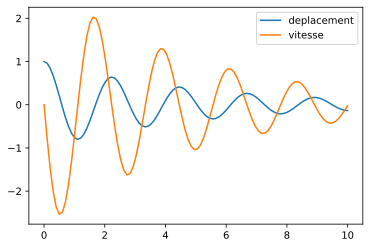

In [71]:
xi = c / (2 * m * np.sqrt(k/m))
omega = np.sqrt(k / m)

def dX_dt(X, time, xi, omega):  ## , xi, omega
    ## X = [x, y] avec y = dx/dt 
    return np.array([X[1], -xi * omega * X[1] - omega**2 * X[0]])


time_steps = np.linspace(0, 10, 100)
etat_init = np.array((1, 0))   ## (Deplacement, vitesse)
solution = sci2.odeint(dX_dt, etat_init, time_steps, args=(xi, omega))

#[ [u(t=0),   v(t=0)]
#  [u(t=0.1), v(t=0.1)]
#  ...
#  [u(t=T),   v(t=T)]
# ]
## Plot de la solution
plt.plot( time_steps, solution[:,0], label="deplacement")
plt.plot( time_steps, solution[:,1], label="vitesse")
plt.legend()


Si vous souhaitez avoir plus d'information sur la résolution du problème vous pouvez mettre l'argument `full_output` à `True` ce qui vous renverra alors en sortie un dictionnaire contenant un certain nombre d'informations. 

### scipy.optimize

Ensuite SciPy dispose également d'outils pour l'optimisation. C'est-à-dire de fonction permettant de résoudre des problèmes de la forme : 
$$ x = \text{argmin}\, f(x) $$
ou encore de la forme : 
$$ f(x) = 0 $$


In [29]:
import scipy.optimize as sco

#### Minimisation de fonctions 

Le premier mode d'utilisation est pour trouver le minimum d'une fonction scalaire ou non. Pour cela il suffit d'utiliser la fonction `minimize`. Cette dernière accepte un grand nombre de paramètres d'entrées optionnels, notamment la méthode à utiliser. Pour une description de toutes les méthodes et options disponibles vous êtes encouragé à aller voir la [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). Ci-dessous un exemple d'utilisation de `minimize` sur une fonction 2d. 

In [76]:
def rosenbrock(X, coeff):
    x = X[0]
    y = X[1]
    a = 1. - x
    b = y - x*x
    return a*a + b*b*coeff

result = sco.minimize(rosenbrock, x0=[0.5,-1.], args=(100., ))
print(result)


      fun: 2.005598611739819e-11
 hess_inv: array([[0.50007473, 1.00014719],
       [1.00014719, 2.00528986]])
      jac: array([-1.06438309e-09,  5.26179100e-10])
  message: 'Optimization terminated successfully.'
     nfev: 132
      nit: 28
     njev: 33
   status: 0
  success: True
        x: array([0.99999552, 0.99999104])


In [73]:
result.x

array([0.99999552, 0.99999104])

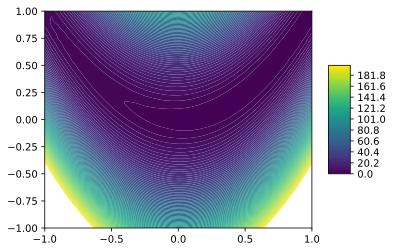

In [74]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca()

s = 0.05                    # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-1, 1.+s, s)  #Could use linspace instead if dividing
Y = np.arange(-1, 1.+s, s)  #evenly instead of stepping...
    
X, Y = np.meshgrid(X, Y)
Z = (1.-X)**2 + 100.*(Y-X*X)**2
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
#        linewidth=0, antialiased=False)  #Try coolwarm vs jet

surf = ax.contourf(X,Y,Z, levels=np.linspace(0,200,100))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### Zéro d'une fonction

Le second intérêt du module `scipy.optimize` est qu'il permet de déterminer le zéro d'une fonction. Pour cela il suffit d'utiliser la fonction `root`. Cette fonction n'opère que sur des fonction dont le nombre de variable d'entrée est égal au nombre de sortie.  

In [77]:

def model(X):
    x = X[0]
    y = X[1]
    
    return np.array([x**2+2*x*y, x*y+1.])


X0 = [0,1]

result = sco.root(model, X0)

print(result)



    fjac: array([[-0.99993948,  0.01100164],
       [-0.01100164, -0.99993948]])
     fun: array([-4.68070027e-12, -2.35345077e-12])
 message: 'The solution converged.'
    nfev: 29
     qtf: array([-1.43595947e-08, -7.41886383e-09])
       r: array([2.76037926, 2.81923158, 1.44862119])
  status: 1
 success: True
       x: array([-1.41421356,  0.70710678])


#### Minimisation par rapport à une courbe expérimentale 

Enfin pour finir avec le module d'optimisation de scipy nous allons voir une fonction qui vous sera certainement très utile à l'avenir. Il sagit de la fonction `curve_fit`. Cette fonction permet, comme son nom le laisse penser, de faire coller un modèle numérique définit par une fonction Python et dépendant d'un ensemble de paramètre et un ensemble de données expérimentales. C'est donc particulièrement utile pour l'identification de paramètres de modèle à partir d'essais. 

[[ 0.00272296 -0.00868014]
 [-0.00868014  0.09337934]]
[17.19633308 22.25810847] [0.05218199 0.30558033]
[ 1.68994947e-01  2.80326376e+02 -1.49673869e+03  3.15816645e+03
 -2.29047259e+03] [ 0.13891479  3.65193051 26.61833393 70.16358418 60.206741  ]


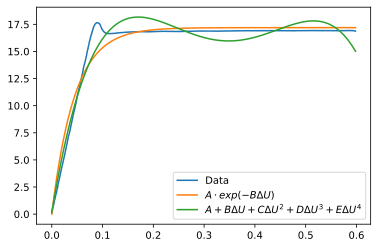

In [83]:
def fit_expo(x, *toto): 
    return toto[0]*(1.-np.exp(-toto[1]*x)) 

def fit_poly(x, *p): 
    return p[0]+p[1]*x+p[2]*x**2+p[3]*x**3+p[4]*x**4

data = np.loadtxt("data/curves/data.txt", comments="#")
from scipy.optimize import curve_fit
x = data[:,3]
y = data[:,2]
p1, pcov = curve_fit(fit_expo,x,y, p0=[1.0,0.1])
print(pcov)
print( p1, np.sqrt(np.diag(pcov)) )
p2, pcov = curve_fit(fit_poly,x,y, p0 = [1.0,1.0, 1.0,1.0,1.0])
print( p2, np.sqrt(np.diag(pcov)) )
plt.plot(x,y, label='Data')
plt.plot(x, fit_expo(x, *p1),label="$A\cdot exp( -B \Delta U)$")
plt.plot(x, fit_poly(x, *p2),label="$A+B\Delta U + C\Delta U^2 + D\Delta U^3 + E\Delta U^4$")
plt.legend()
plt.show()


### scipy.signal

Pour finir, le dernier sous-module SciPy que nous allons voir dans ce cours est `scipy.signal`. Ce sous-module met à disposition un certain nombre de fonctionnalités dédiées au traitement de signaux 1-d. Il permet entre autre de : 

* filtrer des données bruitées. 
* faire des analyses spectrales.
* localiser des pics. 

Le module `scipy.signal` offre encore d'autres fonctionnalitées que nous n'aborderons pas ici, comme toujours pour plus de détails vous êtes invité à consulter la [documentation](https://docs.scipy.org/doc/scipy/reference/signal.html).  

Nous allons traiter ici l'application typique qui est le filtrage d'un signal bruité. Pour simuler un signal bruité nous allons utiliser la fonction `randn` de numpy qui génère un tableau aléatoire ainsi que le fonction `cumsum` qui permet de calculer le tableau correspondant à la somme cumulée (l'idée est d'avoir un signal qui n'est pas centré en 0).

In [58]:
import numpy as np
from numpy.random import randn
from numpy.fft import rfft
from scipy import signal
import matplotlib.pyplot as plt

### Generation des donnees bruitees
sig = np.cumsum(randn(800))  # Brownian noise

La démarche est la suivante : 
* Construction d'un filtre à l'aide la fonction `signal.butter` où le premier argument est l'ordre du filtre et le second argument correspond à la fréquence de coupure (le point à -3dB)
* Application à l'aide de la méthode `signal.filtfilt`. La particularité de cette méthode est qu'elle applique le filtre deux fois : (i) une première fois de manière directe (de t=0 à t=T) ; (ii) une seconde seconde de manière rétrograde (de t=T à t=0). 

In [81]:
### Construction d'un filtre 
b, a = signal.butter(4, 0.03, analog=False)
print(b, a)



### Application du filtre en direct et retrograde
sig_ff = signal.filtfilt(b, a, sig)


[4.37268880e-06 1.74907552e-05 2.62361328e-05 1.74907552e-05
 4.37268880e-06] [ 1.         -3.75376276  5.29115258 -3.3189386   0.78161874]


In [82]:
signal.butter?

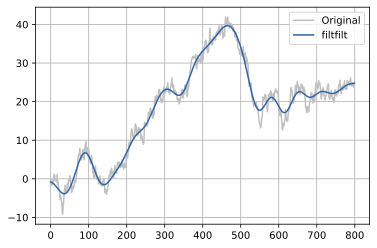

In [60]:

%matplotlib inline
### plot
plt.plot(sig, color='silver', label='Original')
plt.plot(sig_ff, color='#3465a4', label='filtfilt')
plt.grid(True, which='both')
plt.legend(loc="best")